In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv("/Users/edouardlacroix/Desktop/test/archive/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [39]:
print("-----SHAPE-----")
print(df.shape)
print("-----INFO-----")
print(df.info())
print("-----HEAD-----")
print(df.head())

-----SHAPE-----
(101766, 50)
-----INFO-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures 

In [40]:
print(df["readmitted"].value_counts())
print(df["readmitted"].value_counts(normalize=True))

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64
readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: proportion, dtype: float64


On observe qu’environ la moitié des hospitalisations sont suivies d’une réadmission. Cependant, la réadmission à moins de 30 jours — qui constitue la variable cible — reste minoritaire, ce qui introduit un déséquilibre de classes important.

In [41]:
(df == "?").sum().sort_values(ascending=False).head(10)

weight               98569
medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
tolazamide               0
glyburide                0
dtype: int64

On note que les colonnes ayant des valeurs manquantes sont les suivantes :

- "weight"
- "medical_specialty"
- "payer_code"
- "race"
- "diag_3"
- "diag_2"
- "diag_1"





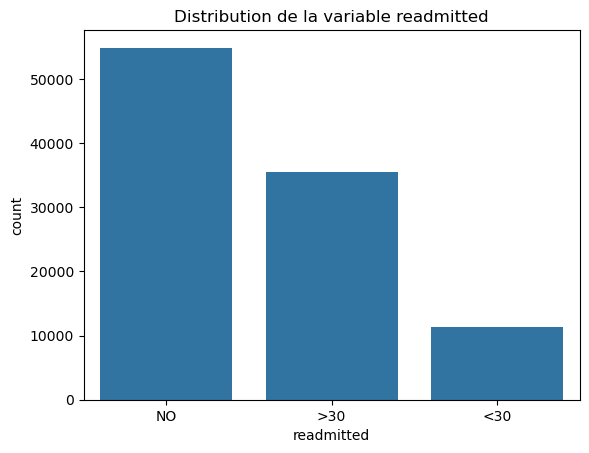

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = df, x = "readmitted")
plt.title("Distribution de la variable readmitted")

plt.show()

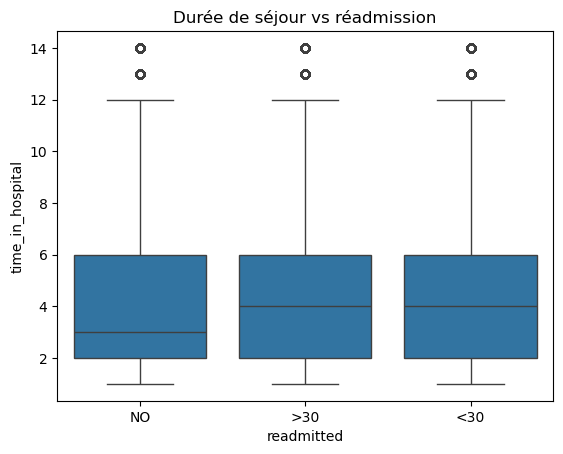

In [43]:
sns.boxplot(data= df, x = "readmitted", y = "time_in_hospital")
plt.title("Durée de séjour vs réadmission")

plt.show()

In [44]:
df = df.drop(columns=["encounter_id", "patient_nbr"])
df

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),?,1,1,7,3,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),?,1,1,7,2,?,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),?,1,1,7,1,?,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),?,1,3,7,3,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,AfricanAmerican,Female,[80-90),?,1,4,5,5,MC,?,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,Caucasian,Male,[70-80),?,1,1,7,1,MC,?,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,Caucasian,Female,[80-90),?,2,3,7,10,MC,Surgery-General,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [45]:
df["readmitted_30"] = df["readmitted"].apply(lambda x : 1 if x == "<30" else 0)
df.drop(columns="readmitted", inplace=True)

df.columns

Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted_30'],
      dtype='object')

Après la création de la variable cible binaire readmitted_30, la variable originale readmitted est supprimée afin d’éviter toute redondance ou fuite d’information.

In [46]:
X = df.drop(columns="readmitted_30")
y = df["readmitted_30"]


In [47]:
X.dtypes.value_counts()

object    36
int64     11
Name: count, dtype: int64

In [48]:
cat_col = X.select_dtypes(include="object").columns
num_col = X.select_dtypes(exclude="object").columns

len(cat_col), len(num_col)

(36, 11)

Les variables ont été séparées en variables numériques et catégorielles afin d’appliquer un traitement adapté à chacune d’elles.

# Étape 6 — Encodage

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_col),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), cat_col)
    ]
)

Un ColumnTransformer est utilisé afin d’appliquer un encodage One-Hot aux variables catégorielles tout en conservant les variables numériques inchangées.

# Étape 7 — Train / Test split + modèle de base

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size= 0.2,
    random_state= 42,
    stratify=y
)

La séparation train/test est réalisée en conservant la distribution de la variable cible.

In [52]:
from sklearn.linear_model import LogisticRegression

log_reg= LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    n_jobs=-1
)

In [53]:
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", log_reg)
])

In [54]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  Index(['admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncode...
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    n_jobs=-1))])

Le modèle présente un warning de convergence, ce qui est attendu sur ce type de données non standardisées. Une étape de scaling permettrait d’améliorer la convergence.